<h1> Name: Rahul Varma </h1>
<h2> Roll No: S20200010212 </h2>

<h2> CV Assignment - 3 </h2>

In [36]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the CIFAR-10 dataset

In [37]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

data_x = np.concatenate((x_train, x_test))
data_y = np.concatenate((y_train, y_test))

print(data_x.shape, data_y.shape)

(60000, 32, 32, 3) (60000, 1)


Training --> 80%, Validation --> 10% and Test --> 10%.

In [38]:
# Split data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.8)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

Split 60000 images into 48000 training, 6000 validation and 6000 test images.

In [39]:
print("Train:", x_train.shape, y_train.shape)
print("Validation:", x_val.shape, y_val.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (48000, 32, 32, 3) (48000, 1)
Validation: (6000, 32, 32, 3) (6000, 1)
Test: (6000, 32, 32, 3) (6000, 1)


Transforming the images to tensors and normalizing them.

In [40]:
from tensorflow import keras

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 3072)).reshape(-1, 32, 32, 3)
x_val = scaler.transform(x_val.reshape(-1, 3072)).reshape(-1, 32, 32, 3)
x_test = scaler.transform(x_test.reshape(-1, 3072)).reshape(-1, 32, 32, 3)

# Convert labels to one-hot vectors
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


<h1> KNN Classifier </h1>

Model for KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)

# Train KNN model
knn.fit(x_train.reshape(len(x_train), -1), y_train.argmax(axis=1))


KNeighborsClassifier(n_jobs=-1, weights='distance')

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

KNN Model Accuracy, Loss and Confusion Matrix

In [43]:
# Evaluate KNN model
knn_train_acc = accuracy_score(y_train.argmax(axis=1), knn.predict(x_train.reshape(len(x_train), -1)))
knn_val_acc = accuracy_score(y_val.argmax(axis=1), knn.predict(x_val.reshape(len(x_val), -1)))
knn_test_acc = accuracy_score(y_test.argmax(axis=1), knn.predict(x_test.reshape(len(x_test), -1)))

print("KNN Train Acc: {:.3f}".format(knn_train_acc))
print("KNN Val Acc: {:.3f}".format(knn_val_acc))
print("KNN Test Acc: {:.3f}".format(knn_test_acc))
print()
print("KNN Train Loss: {:.3f}".format(1 - knn_train_acc))
print("KNN Val Loss: {:.3f}".format(1 - knn_val_acc))
print("KNN Test Loss: {:.3f}".format(1 - knn_test_acc))

KNN Train Acc: 1.000
KNN Val Acc: 0.349
KNN Test Acc: 0.368

KNN Train Loss: 0.000
KNN Val Loss: 0.651
KNN Test Loss: 0.632


Precision, Recall and F1 Score for KNN Classifier

In [44]:
# Calculate Precision, Recall, and Accuracy for KNN model
knn_precision = precision_score(y_test.argmax(axis=1), knn.predict(x_test.reshape(len(x_test), -1)), average='weighted')
knn_recall = recall_score(y_test.argmax(axis=1), knn.predict(x_test.reshape(len(x_test), -1)), average='weighted')
knn_accuracy = accuracy_score(y_test.argmax(axis=1), knn.predict(x_test.reshape(len(x_test), -1)))

print("KNN Precision: {:.3f}".format(knn_precision))
print("KNN Recall: {:.3f}".format(knn_recall))
print("KNN Accuracy: {:.3f}".format(knn_accuracy))

KNN Precision: 0.447
KNN Recall: 0.368
KNN Accuracy: 0.368


Classification Report for KNN Classifier

In [45]:
# Classification Report for KNN model
print(classification_report(y_test.argmax(axis=1), knn.predict(x_test.reshape(len(x_test), -1))))

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       608
           1       0.72      0.18      0.29       583
           2       0.27      0.37      0.31       602
           3       0.29      0.20      0.24       595
           4       0.24      0.56      0.33       587
           5       0.41      0.28      0.33       569
           6       0.36      0.36      0.36       607
           7       0.67      0.27      0.38       592
           8       0.41      0.69      0.51       662
           9       0.66      0.19      0.30       595

    accuracy                           0.37      6000
   macro avg       0.45      0.36      0.36      6000
weighted avg       0.45      0.37      0.36      6000



KNN ROC Curve

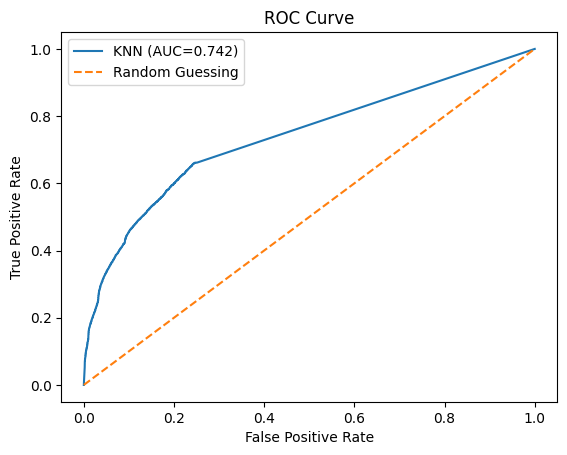

In [46]:
import matplotlib.pyplot as plt

# Plot ROC curve for KNN model
knn_probs = knn.predict_proba(x_test.reshape(len(x_test), -1))
knn_auc = roc_auc_score(y_test, knn_probs, multi_class='ovr')
knn_fpr, knn_tpr, _ = roc_curve(y_test.ravel(), knn_probs.ravel())
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC={:.3f})'.format(knn_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

# Set plot title and labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show plot
plt.show()

Confusion Matrix for KNN Classifier

<AxesSubplot: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

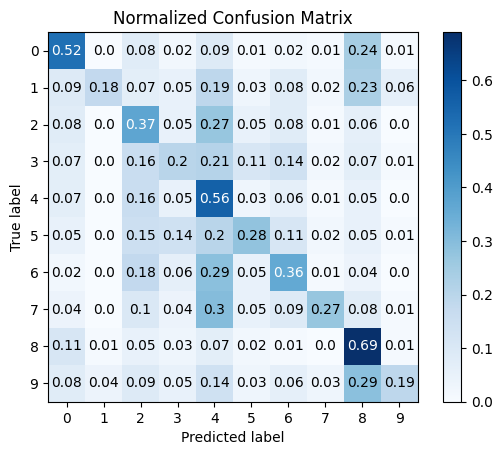

In [47]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test.argmax(axis=1), knn.predict(x_test.reshape(len(x_test), -1)), normalize=True)

KNN ROC Curve for all classes

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

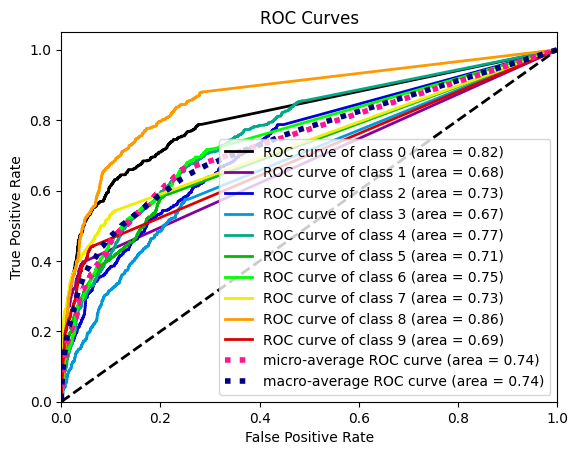

In [48]:
proba_y = knn.predict_proba(x_test.reshape(len(x_test), -1))
skplt.metrics.plot_roc(y_test.argmax(axis=1), proba_y)

<h1> SVM Classifier </h1>

Model for SVM Classifier

In [49]:
from sklearn.svm import SVC

# Non linear SVM model
svm = SVC(kernel='rbf', probability=True)

# Train SVM model
svm.fit(x_train.reshape(len(x_train), -1), y_train.argmax(axis=1))


SVC(probability=True)

Accuracy, Loss and Confusion Matrix for SVM Classifier

In [50]:
# Evaluate non-linear SVM model
svm_train_acc = accuracy_score(y_train.argmax(axis=1), svm.predict(x_train.reshape(len(x_train), -1)))
svm_val_acc = accuracy_score(y_val.argmax(axis=1), svm.predict(x_val.reshape(len(x_val), -1)))
svm_test_acc = accuracy_score(y_test.argmax(axis=1), svm.predict(x_test.reshape(len(x_test), -1)))

print("Non-linear SVM Train Acc: {:.3f}".format(svm_train_acc))
print("Non-linear SVM Val Acc: {:.3f}".format(svm_val_acc))
print("Non-linear SVM Test Acc: {:.3f}".format(svm_test_acc))
print()
print("Non-linear SVM Train Loss: {:.3f}".format(1 - svm_train_acc))
print("Non-linear SVM Val Loss: {:.3f}".format(1 - svm_val_acc))
print("Non-linear SVM Test Loss: {:.3f}".format(1 - svm_test_acc))

Non-linear SVM Train Acc: 0.712
Non-linear SVM Val Acc: 0.538
Non-linear SVM Test Acc: 0.541

Non-linear SVM Train Loss: 0.288
Non-linear SVM Val Loss: 0.462
Non-linear SVM Test Loss: 0.459


In [51]:
# Calculate Precision, Recall, and Accuracy for non-linear SVM model
svm_precision = precision_score(y_test.argmax(axis=1), svm.predict(x_test.reshape(len(x_test), -1)), average='weighted')
svm_recall = recall_score(y_test.argmax(axis=1), svm.predict(x_test.reshape(len(x_test), -1)), average='weighted')
svm_accuracy = accuracy_score(y_test.argmax(axis=1), svm.predict(x_test.reshape(len(x_test), -1)))

print("Non-linear SVM Precision: {:.3f}".format(svm_precision))
print("Non-linear SVM Recall: {:.3f}".format(svm_recall))
print("Non-linear SVM Accuracy: {:.3f}".format(svm_accuracy))

Non-linear SVM Precision: 0.539
Non-linear SVM Recall: 0.541
Non-linear SVM Accuracy: 0.541


Classification Report for SVM Classifier

In [52]:
print(classification_report(y_test.argmax(axis=1), svm.predict(x_test.reshape(len(x_test), -1))))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       608
           1       0.62      0.67      0.65       583
           2       0.44      0.41      0.42       602
           3       0.37      0.37      0.37       595
           4       0.48      0.45      0.46       587
           5       0.46      0.43      0.44       569
           6       0.53      0.60      0.57       607
           7       0.62      0.56      0.59       592
           8       0.68      0.66      0.67       662
           9       0.56      0.62      0.59       595

    accuracy                           0.54      6000
   macro avg       0.54      0.54      0.54      6000
weighted avg       0.54      0.54      0.54      6000



ROC Curve for SVM Classifier

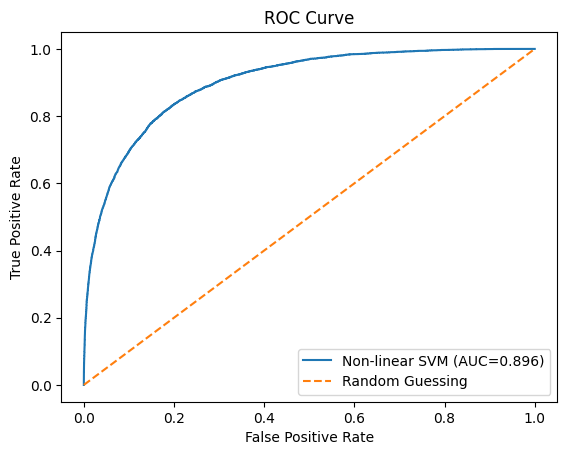

In [53]:
# Plot ROC curve for non-linear SVM model
svm_probs = svm.predict_proba(x_test.reshape(len(x_test), -1))
svm_auc = roc_auc_score(y_test, svm_probs, multi_class='ovr')
svm_fpr, svm_tpr, _ = roc_curve(y_test.ravel(), svm_probs.ravel())
plt.plot(svm_fpr, svm_tpr, label='Non-linear SVM (AUC={:.3f})'.format(svm_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

# Set plot title and labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show plot
plt.show()

Confusion Matrix for SVM Classifier

<AxesSubplot: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

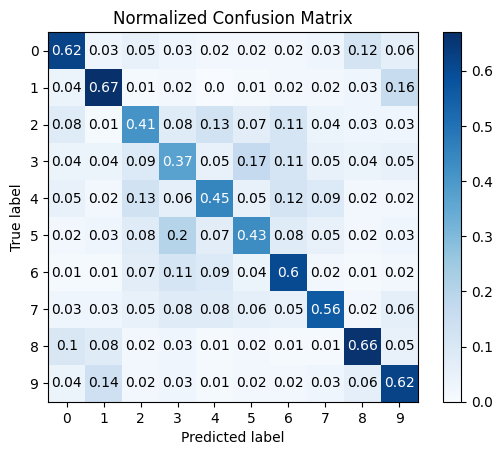

In [54]:
skplt.metrics.plot_confusion_matrix(y_test.argmax(axis=1), svm.predict(x_test.reshape(len(x_test), -1)), normalize=True)

ROC Curve for all classes

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

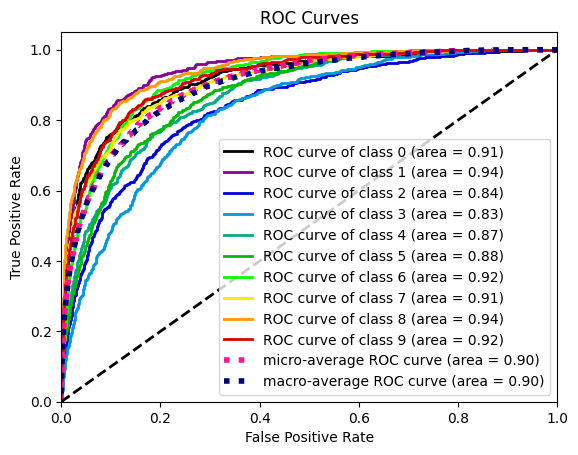

In [55]:
proba_y = svm.predict_proba(x_test.reshape(len(x_test), -1))
skplt.metrics.plot_roc(y_test.argmax(axis=1), proba_y)

<h1> CNN Classifier </h1>

Model for CNN Classifier

In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import VGG16, InceptionV3, ResNet50

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))


# Create CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

vgg_model.trainable = True

# Compile CNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train CNN model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
375/375 [==============================] - 143s 378ms/step - loss: 1.4655 - accuracy: 0.4700 - val_loss: 1.1305 - val_accuracy: 0.5965
Epoch 2/20
375/375 [==============================] - 158s 421ms/step - loss: 1.0448 - accuracy: 0.6269 - val_loss: 0.8619 - val_accuracy: 0.6990
Epoch 3/20
375/375 [==============================] - 162s 432ms/step - loss: 0.8903 - accuracy: 0.6858 - val_loss: 0.7887 - val_accuracy: 0.7223
Epoch 4/20
375/375 [==============================] - 134s 358ms/step - loss: 0.7839 - accuracy: 0.7245 - val_loss: 0.7508 - val_accuracy: 0.7430
Epoch 5/20
375/375 [==============================] - 138s 367ms/step - loss: 0.7103 - accuracy: 0.7477 - val_loss: 0.6770 - val_accuracy: 0.7677
Epoch 6/20
375/375 [==============================] - 149s 397ms/step - loss: 0.6606 - accuracy: 0.7672 - val_loss: 0.6599 - val_accuracy: 0.7717
Epoch 7/20
375/375 [==============================] - 116s 309ms/step - loss: 0.5978 - accuracy: 0.7898 - val_loss: 0.6442 -

Training Accuracy, Loss and Validation Accuracy, Loss for CNN Classifier

In [58]:
# Evaluate CNN model
cnn_train_acc = history.history['accuracy'][-1]
cnn_val_acc = history.history['val_accuracy'][-1]
cnn_test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

print("CNN Train Acc: {:.3f}".format(cnn_train_acc))
print("CNN Val Acc: {:.3f}".format(cnn_val_acc))
print("CNN Test Acc: {:.3f}".format(cnn_test_acc))
print()
print("CNN Train Loss: {:.3f}".format(1 - cnn_train_acc))
print("CNN Val Loss: {:.3f}".format(1 - cnn_val_acc))
print("CNN Test Loss: {:.3f}".format(1 - cnn_test_acc))


CNN Train Acc: 0.896
CNN Val Acc: 0.817
CNN Test Acc: 0.810

CNN Train Loss: 0.104
CNN Val Loss: 0.183
CNN Test Loss: 0.190


In [59]:
y_pred = model.predict(x_test)

188/188 [==============================] - 4s 19ms/step


Precision and Recall for CNN Classifier

In [60]:
# Calculate Precision, Recall, and Accuracy for CNN model
cnn_precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
cnn_recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
cnn_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print("CNN Precision: {:.3f}".format(cnn_precision))
print("CNN Recall: {:.3f}".format(cnn_recall))
print("CNN Accuracy: {:.3f}".format(cnn_accuracy))

CNN Precision: 0.815
CNN Recall: 0.810
CNN Accuracy: 0.810


Classification Report for CNN Classifier

In [61]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       608
           1       0.88      0.92      0.90       583
           2       0.77      0.70      0.73       602
           3       0.62      0.70      0.66       595
           4       0.80      0.76      0.78       587
           5       0.67      0.74      0.71       569
           6       0.82      0.89      0.85       607
           7       0.91      0.79      0.85       592
           8       0.92      0.90      0.91       662
           9       0.85      0.89      0.87       595

    accuracy                           0.81      6000
   macro avg       0.81      0.81      0.81      6000
weighted avg       0.81      0.81      0.81      6000



ROC Curve for CNN Classifier

188/188 [==============================] - 3s 18ms/step


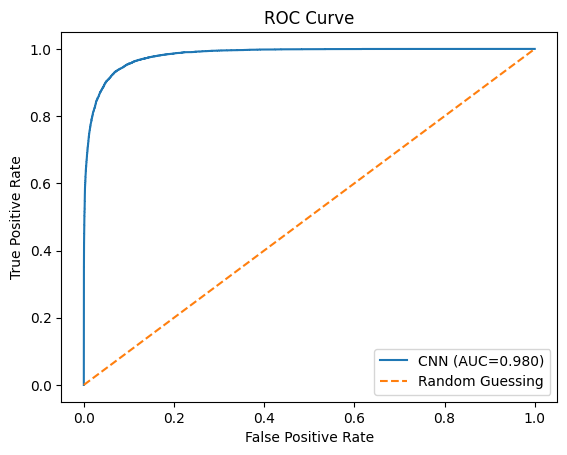

In [62]:
# Plot ROC curve for CNN model
cnn_probs = model.predict(x_test)
cnn_auc = roc_auc_score(y_test, cnn_probs, multi_class='ovr')
cnn_fpr, cnn_tpr, _ = roc_curve(y_test.ravel(), cnn_probs.ravel())
plt.plot(cnn_fpr, cnn_tpr, label='CNN (AUC={:.3f})'.format(cnn_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

# Set plot title and labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show plot
plt.show()


Confusion Matrix for CNN Classifier

<AxesSubplot: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

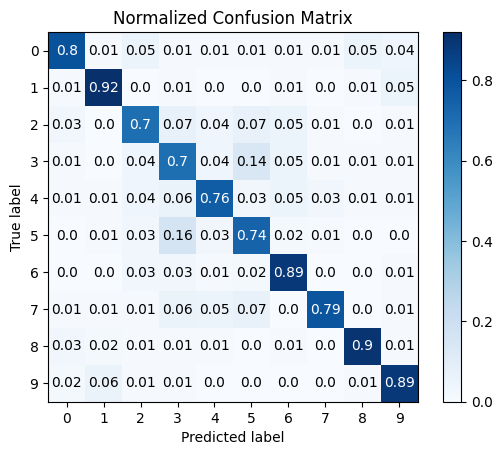

In [63]:
skplt.metrics.plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize=True)

ROC Curve for all classes

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

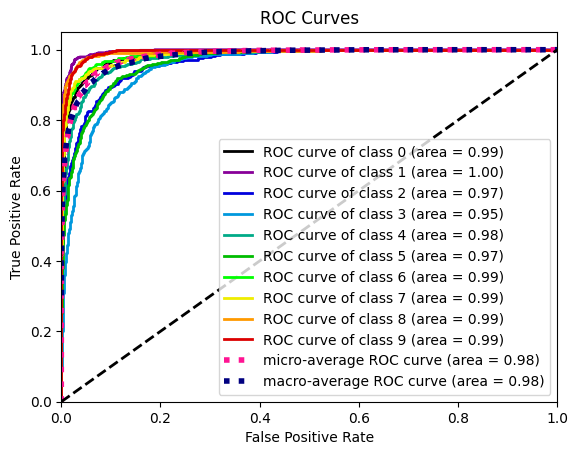

In [64]:
# Plot ROC curve for CNN model
skplt.metrics.plot_roc(y_test.argmax(axis=1), y_pred)